# 🧠 Customer Segmentation using K-Means

In this project, we use **K-Means Clustering** to segment mall customers based on their **Annual Income** and **Spending Score**.  
This helps businesses personalize marketing efforts and identify customer personas.

🔍 Dataset: Mall Customrs  


**Load Libraries & Dataset**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

# Load dataset
df = pd.read_csv('Mall Customers Dataset.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**Preprocessing**

In [3]:
# Drop CustomerID as it's not useful for clustering
df.drop('CustomerID', axis=1, inplace=True)

# Encode Genre (Male/Female)
le = LabelEncoder()
df['Genre'] = le.fit_transform(df['Genre'])  # Male=1, Female=0

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Genre                   200 non-null    int32
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
dtypes: int32(1), int64(3)
memory usage: 5.6 KB


**EDA – Understand Customer Patterns**

C:\Users\Global\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Global\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Global\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


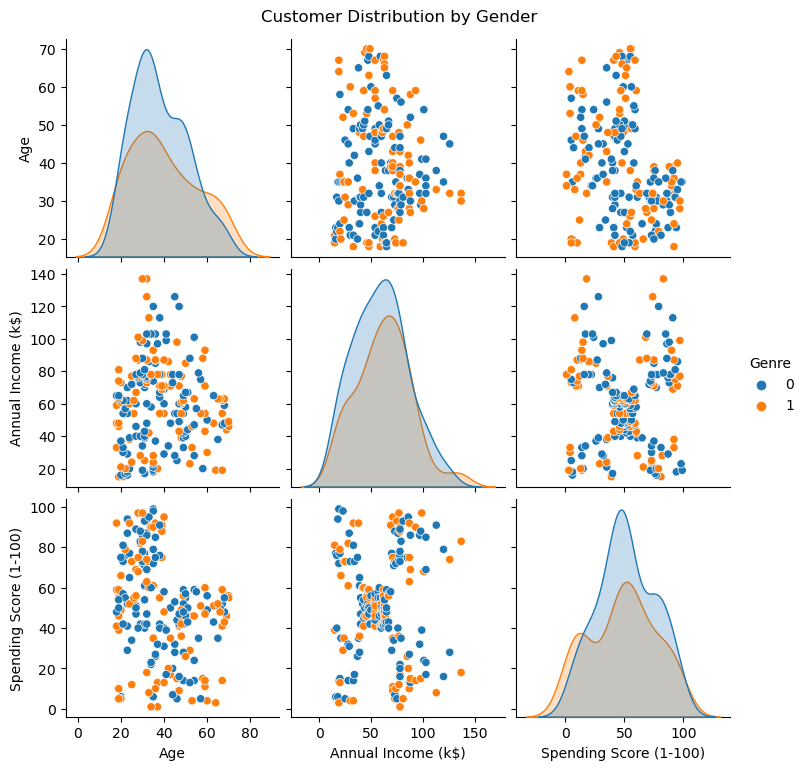

In [4]:
# Pairplot to see trends
sns.pairplot(df, hue='Genre')
plt.suptitle("Customer Distribution by Gender", y=1.02)
plt.show()

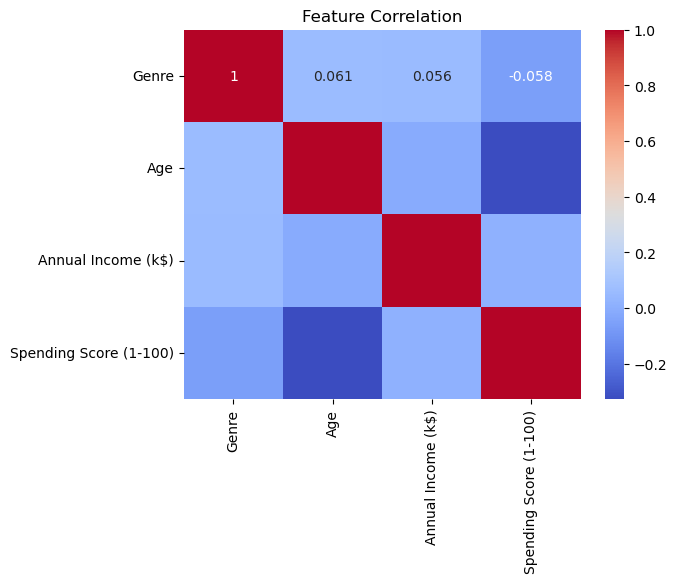

In [5]:
# Correlation Heatmap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()


**Apply K-Means Clustering**

C:\Users\Global\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Global\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Global\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Global\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Wi

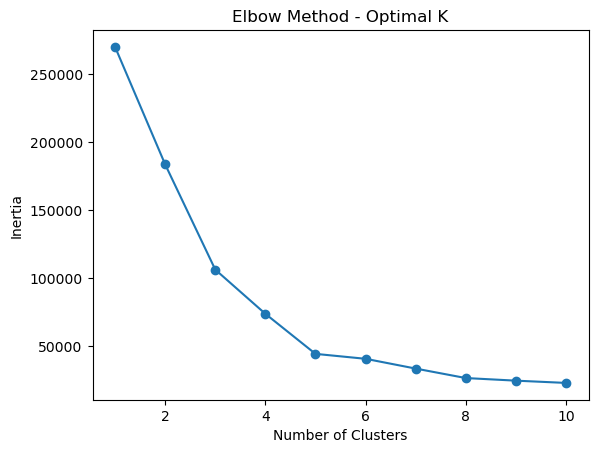

In [6]:
# Select features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Elbow Method to find optimal clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method - Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

**Train K-Means with Optimal K**

C:\Users\Global\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


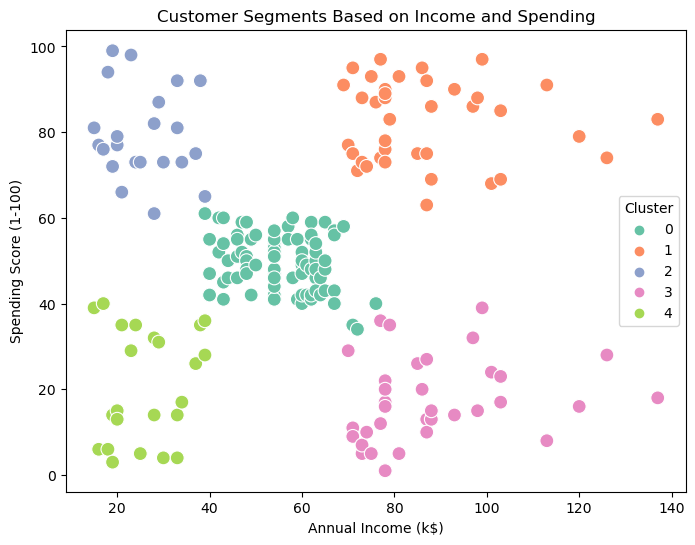

In [7]:
# Let's say optimal k = 5 (based on elbow)
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Visualize clusters
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set2', s=100)
plt.title("Customer Segments Based on Income and Spending")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(title="Cluster")
plt.show()

**2D Visualization Using PCA**

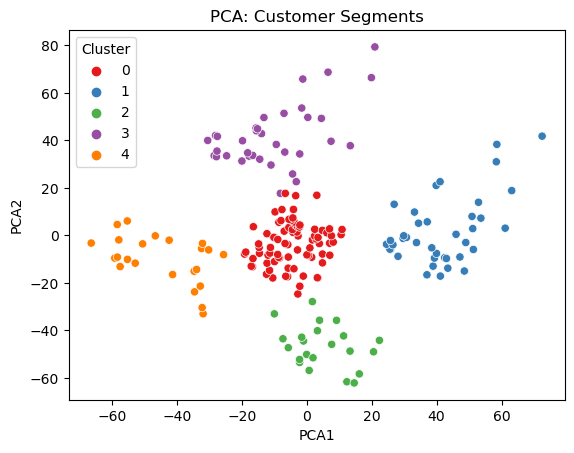

In [8]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]

sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set1')
plt.title("PCA: Customer Segments")
plt.show()

## Cluster Insights & Marketing Strategy

-  Cluster 0: High income, high spenders — Premium customers
-  Cluster 1: Low income, high spenders — Impulsive buyers
-  Cluster 2: High income, low spenders — Need engagement
-  Cluster 3: Average income and spending — Balanced buyers
-  Cluster 4: Low income, low spenders — Budget-sensitive

Businesses can tailor email campaigns, offers, and loyalty rewards based on these groups.